In [120]:
import Disentangler_Draft as dd
import lightkurve as lk
import astropy.units as u
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
frequency_list_1 = [0.6369, 1.2738748 , 4.45856181, 6.36937401, 7.00631141]

In [3]:
frequency_list_2 = [0.1217, 0.24339455, 0.97357818, 1.21697273,1.46036728, 0.48678909, 1.70376182, 2.19055091]

In [4]:
frequency_list_3 = [0.7658, 1.53153077, 6.12612309, 6.89188848]

In [94]:
search_result = lk.search_targetpixelfile('TIC168789840',sector = 31)
tpf = search_result.download(quality_bitmask='default')

In [74]:
test1 = dd.PixelMapFit(targetpixelfile=tpf, gaia=True, magnitude_limit=18, frequencies=frequency_list_1, frequnit=1/u.day, principle_components = 4)

In [75]:
test2 = dd.PixelMapFit(targetpixelfile=tpf, gaia=True, magnitude_limit=18, frequencies=frequency_list_2, frequnit=1/u.day, principle_components = 4)

In [76]:
test3 = dd.PixelMapFit(targetpixelfile=tpf, gaia=True, magnitude_limit=18, frequencies=frequency_list_3, frequnit=1/u.day, principle_components = 4)

## First set of frequencies:

    index         ra        dec               source          x          y  \
0       5  63.520278 -31.922877  4882954370431549824   3.390177   3.331794   
1       6  63.531046 -31.922942  4882954370433202432   5.130468   3.328449   
2       7  63.501002 -31.912103  4882954645311111424   0.466061   5.371229   
3      10  63.539797 -31.905226  4882954782750061952   6.865060   6.716724   
4       8  63.504079 -31.898122  4882954645311109888   1.214921   8.041997   
5       2  63.551764 -31.923042  4882953648878696064   8.479297   3.326287   
6       1  63.538407 -31.948241  4882953545799483520   5.865126  -1.493637   
7       9  63.492912 -31.896146  4882954714030587648  -0.556296   8.409255   
8       0  63.557434 -31.946734  4882953374000789632   8.968694  -1.190590   
9      11  63.536848 -31.883303  4882954885829275904   6.782903  10.898089   
10      4  63.573764 -31.913668  4882953992476077824  12.206665   5.132685   
11     14  63.458284 -31.901152  4883001511994247040  -6.247891 

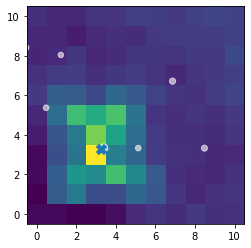

In [77]:
test1.info()

## Second set of frequencies:

    index         ra        dec               source          x          y  \
0       5  63.520278 -31.922877  4882954370431549824   3.390177   3.331794   
1       6  63.531046 -31.922942  4882954370433202432   5.130468   3.328449   
2       7  63.501002 -31.912103  4882954645311111424   0.466061   5.371229   
3      10  63.539797 -31.905226  4882954782750061952   6.865060   6.716724   
4       8  63.504079 -31.898122  4882954645311109888   1.214921   8.041997   
5       1  63.538407 -31.948241  4882953545799483520   5.865126  -1.493637   
6       2  63.551764 -31.923042  4882953648878696064   8.479297   3.326287   
7       9  63.492912 -31.896146  4882954714030587648  -0.556296   8.409255   
8       0  63.557434 -31.946734  4882953374000789632   8.968694  -1.190590   
9      11  63.536848 -31.883303  4882954885829275904   6.782903  10.898089   
10      4  63.573764 -31.913668  4882953992476077824  12.206665   5.132685   
11     14  63.458284 -31.901152  4883001511994247040  -6.247891 

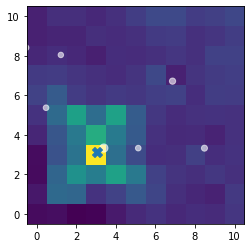

In [78]:
test2.info()

## Third set of frequencies:

    index         ra        dec               source          x          y  \
0       5  63.520278 -31.922877  4882954370431549824   3.390177   3.331794   
1       6  63.531046 -31.922942  4882954370433202432   5.130468   3.328449   
2       7  63.501002 -31.912103  4882954645311111424   0.466061   5.371229   
3      10  63.539797 -31.905226  4882954782750061952   6.865060   6.716724   
4       2  63.551764 -31.923042  4882953648878696064   8.479297   3.326287   
5       8  63.504079 -31.898122  4882954645311109888   1.214921   8.041997   
6       1  63.538407 -31.948241  4882953545799483520   5.865126  -1.493637   
7       9  63.492912 -31.896146  4882954714030587648  -0.556296   8.409255   
8       0  63.557434 -31.946734  4882953374000789632   8.968694  -1.190590   
9      11  63.536848 -31.883303  4882954885829275904   6.782903  10.898089   
10      4  63.573764 -31.913668  4882953992476077824  12.206665   5.132685   
11     14  63.458284 -31.901152  4883001511994247040  -6.247891 

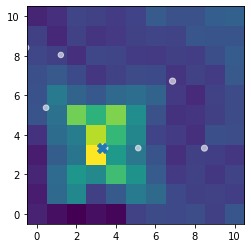

In [79]:
test3.info()

In [80]:
c1 = test1.centroid

In [81]:
c2 = test2.centroid

In [82]:
c3 = test3.centroid

In [118]:
np.sqrt(test2.result.params['x'].stderr**2 + test2.result.params['y'].stderr**2 + test3.result.params['x'].stderr**2 + test3.result.params['y'].stderr**2)

0.055537590886618034

In [113]:
np.sqrt((c3[0] - c1[0])**2 + (c3[1]-c1[1])**2) 

0.09285798589286717

In [119]:
np.sqrt((c2[0] - c3[0])**2 + (c2[1]-c3[1])**2)

0.33636944993240847

In [84]:
np.arctan((c2[1]-c3[1])/(c2[0] - c3[0]))*180/np.pi

36.0085140562288

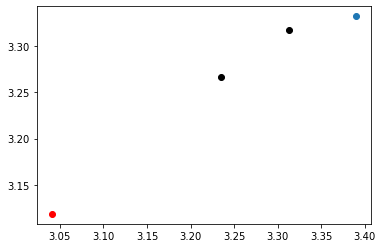

In [91]:
plt.scatter(x=c1[0],y=c1[1],c='black')
plt.scatter(x=c2[0],y=c2[1],c='red')
plt.scatter(x=c3[0],y=c3[1],c='black')
plt.scatter(x=3.390177 , y= 3.331794)

In [97]:
tpf.interact()

In [98]:
from astropy.io import fits

In [100]:
hdul = fits.open('tess2019107181901-prf-2-1-row0513-col1069.fits')

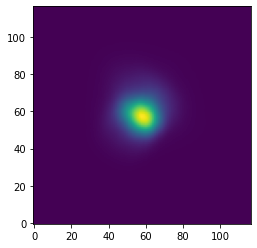

In [112]:
plt.imshow(hdul[0].data,origin='lower')

In [127]:
search_result = lk.search_targetpixelfile('TIC65144290',sector=7)
tpf = search_result.download(quality_bitmask='default')

In [129]:
fl = [9.40357461, 18.80714921, 28.21072382, 37.61429843, 47.01787303,56.42144764, 65.82502225]

In [130]:
lookat = dd.PixelMapFit(targetpixelfile=tpf, gaia=True, magnitude_limit=18, frequencies=fl, frequnit=u.microhertz, principle_components = 4)

     index          ra        dec               source         x          y  \
0       80  107.828133 -25.317701  5617205108735832576  8.363533   2.983834   
1       99  107.827279 -25.316975  5617205108735832320  8.203991   3.071185   
2       97  107.824608 -25.312528  5617205177455073536  7.613644   3.708704   
3       90  107.823605 -25.321951  5617205108735602816  7.857291   2.091107   
4       94  107.821069 -25.314546  5617205177455078144  7.163223   3.229239   
..     ...         ...        ...                  ...       ...        ...   
225    229  107.789434 -25.245282  5617209369343152128 -0.527147  13.556602   
226    228  107.785936 -25.246770  5617209369343156608 -0.993711  13.167174   
227    222  107.761647 -25.262495  5617209231904231296 -4.006465   9.560765   
228    227  107.776643 -25.249333  5617209334983427840 -2.291613  12.365458   
229    221  107.753058 -25.267601  5617209197544502400 -5.090727   8.361586   

       distance    probability  
0      0.011440   

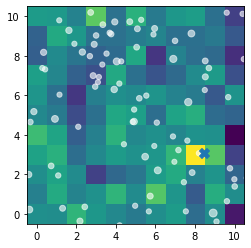

In [131]:
lookat.info()